In [1]:
%matplotlib notebook

In [2]:
from decode_simple_network_replay import *
baks_alpha = 4.7725100028345535
baks_beta = 0.41969058927343522
baks_pad_dur = 3000.  # ms
baks_wrap_around = True
context.update(locals())

In [4]:
# run_data_file_path = 'data/20200610_144659_simple_network_J_8_exported_output.hdf5'
# run_data_file_path = 'data/20200618_192138_simple_network_J_exported_output.hdf5'
# run_data_file_path = 'data/20200619_163719_simple_network_J_exported_output.hdf5'
# run_data_file_path = 'data/20200623_144723_simple_network_J_0_exported_output.hdf5'
run_data_file_path = 'data/20200623_163137_simple_network_J_1_exported_output.hdf5'
with h5py.File(run_data_file_path) as f:
    trial_keys = [key for key in f if key != 'shared_context']

/Users/aaronmil/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  


In [9]:
start_time = time.time()
run_firing_rates_matrix_dict_list = []
first = True
for trial_key in trial_keys[:1]:
    if first:
        run_binned_t, this_run_firing_rates_matrix_dict, sorted_gid_dict = \
            get_run_trial_data_from_file(run_data_file_path, trial_key, context.baks_alpha, context.baks_beta, 
                                         context.baks_pad_dur, context.baks_wrap_around)
        first = False 
    else:
        _, this_run_firing_rates_matrix_dict, _ = \
            get_run_trial_data_from_file(run_data_file_path, trial_key)
    run_firing_rates_matrix_dict_list.append(this_run_firing_rates_matrix_dict)

print('Processing run data for %i trials took %.1f s' % (len(trial_keys), time.time() - start_time))

Processing run data for 5 trials took 44.3 s


In [10]:
mean_trial_run_firing_rates_matrix_dict = dict()
trial_pop_sum_run_firing_rates_list_dict = defaultdict(list)
mean_trial_pop_sum_run_firing_rates_dict = dict()
sem_trial_pop_sum_run_firing_rates_dict = dict()
first = run_firing_rates_matrix_dict_list[0]
num_trials = len(run_firing_rates_matrix_dict_list)
for pop_name in first:
    trial_run_firing_rates_matrix_list = []
    for i in range(num_trials):
        this_trial_run_firing_rates_matrix = run_firing_rates_matrix_dict_list[i][pop_name]
        trial_run_firing_rates_matrix_list.append(this_trial_run_firing_rates_matrix)
        trial_pop_sum_run_firing_rates_list_dict[pop_name].append(np.sum(this_trial_run_firing_rates_matrix, axis=0))
    mean_trial_run_firing_rates_matrix_dict[pop_name] = np.mean(trial_run_firing_rates_matrix_list, axis=0)
    mean_trial_pop_sum_run_firing_rates_dict[pop_name] = np.mean(trial_pop_sum_run_firing_rates_list_dict[pop_name], axis=0)
    sem_trial_pop_sum_run_firing_rates_dict[pop_name] = \
        np.std(trial_pop_sum_run_firing_rates_list_dict[pop_name], axis=0) / np.sqrt(num_trials)

<IPython.core.display.Javascript object>


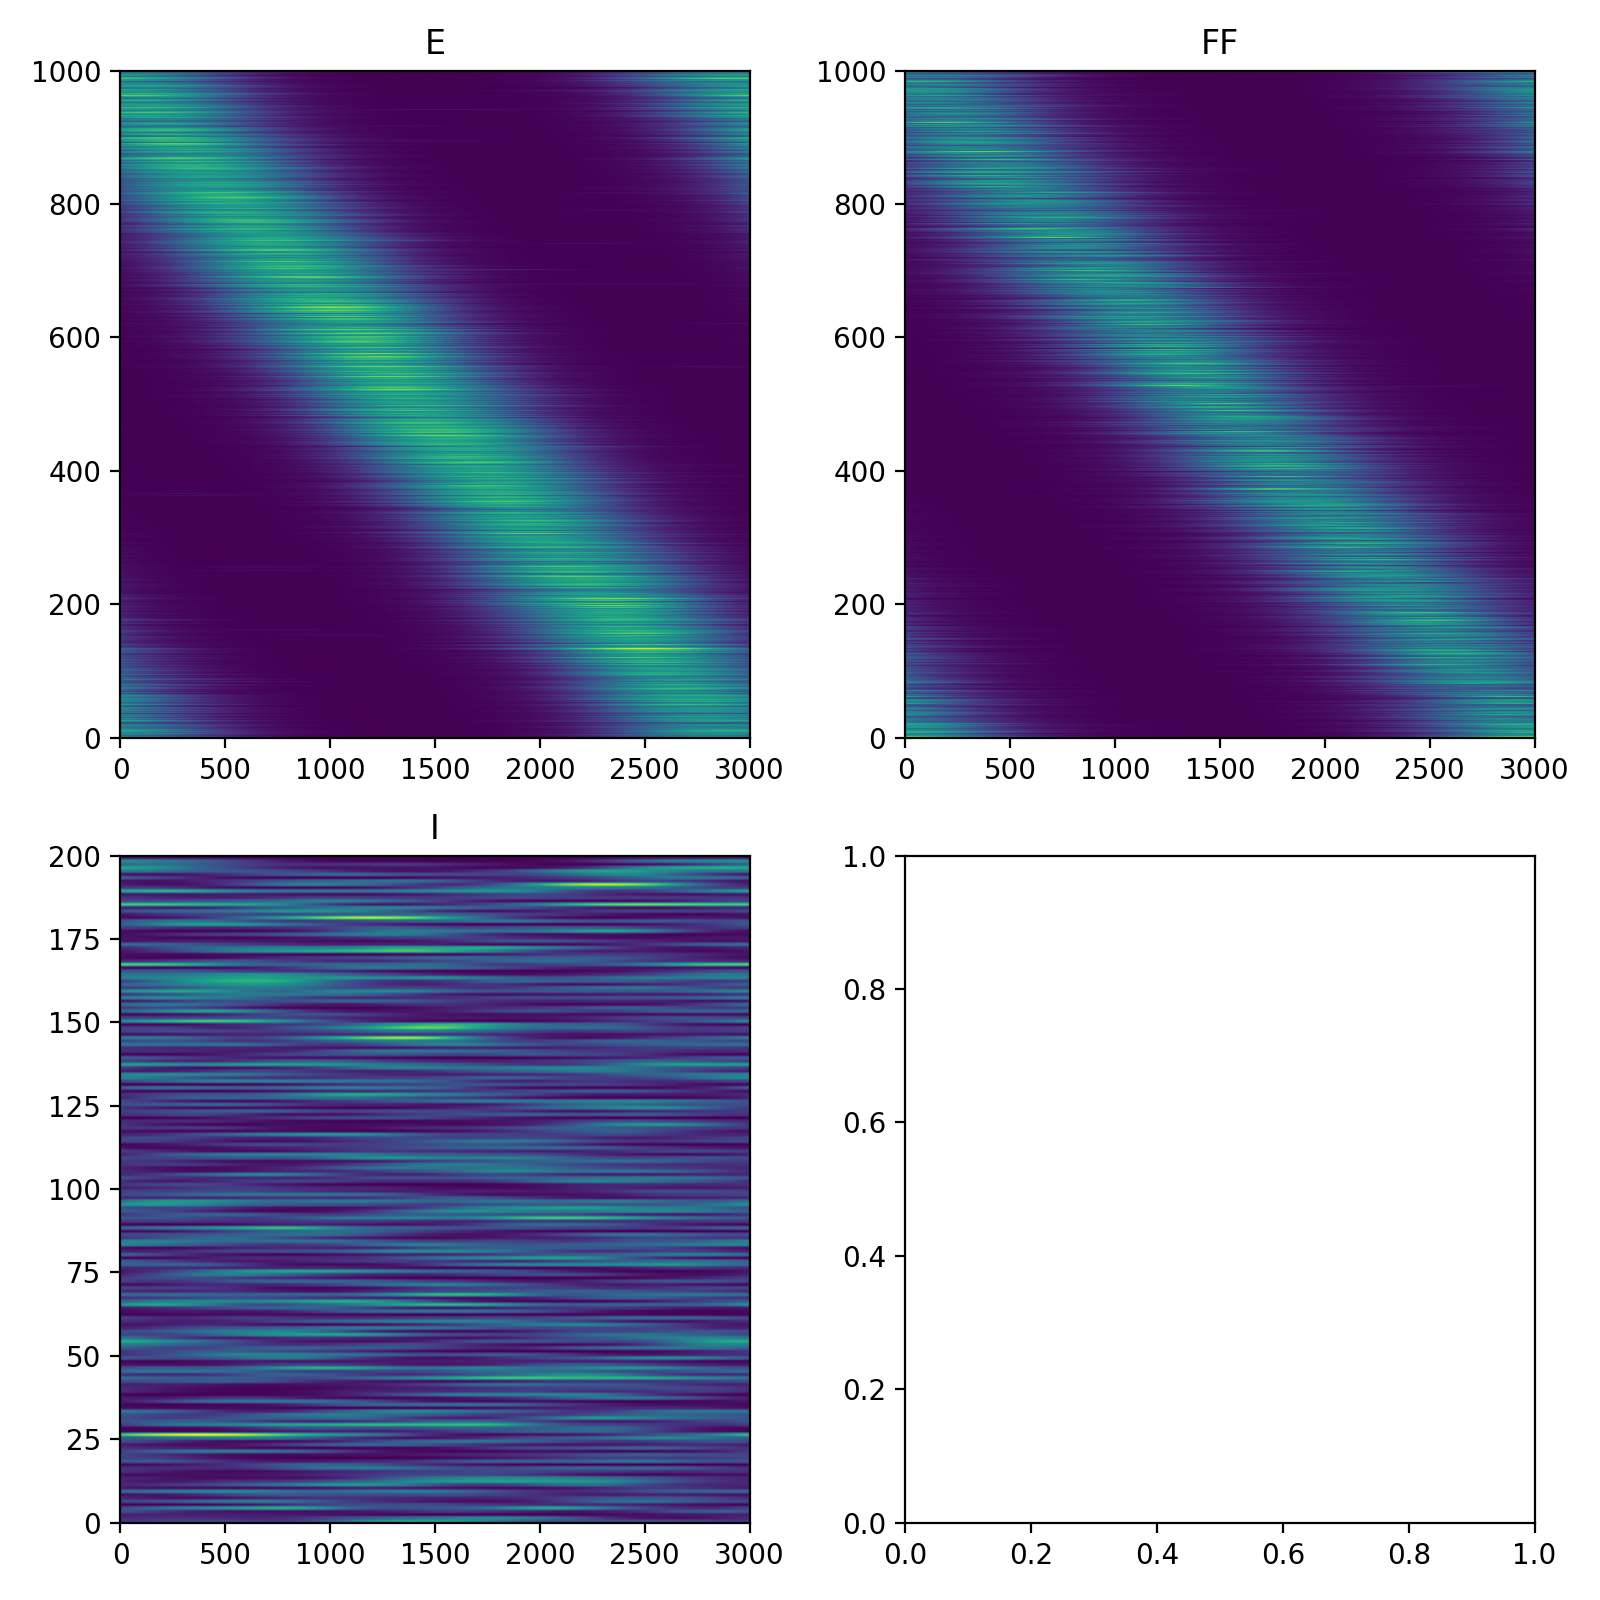

In [11]:
fig, axes = plt.subplots(2, 2, figsize=(8., 8.))
for i, pop_name in enumerate(mean_trial_run_firing_rates_matrix_dict):
    axes.flat[i].imshow(mean_trial_run_firing_rates_matrix_dict[pop_name], 
                   extent=(run_binned_t[0], run_binned_t[-1], 0, len(sorted_gid_dict[pop_name])), aspect='auto')
    axes.flat[i].set_title(pop_name)
fig.tight_layout()

<IPython.core.display.Javascript object>


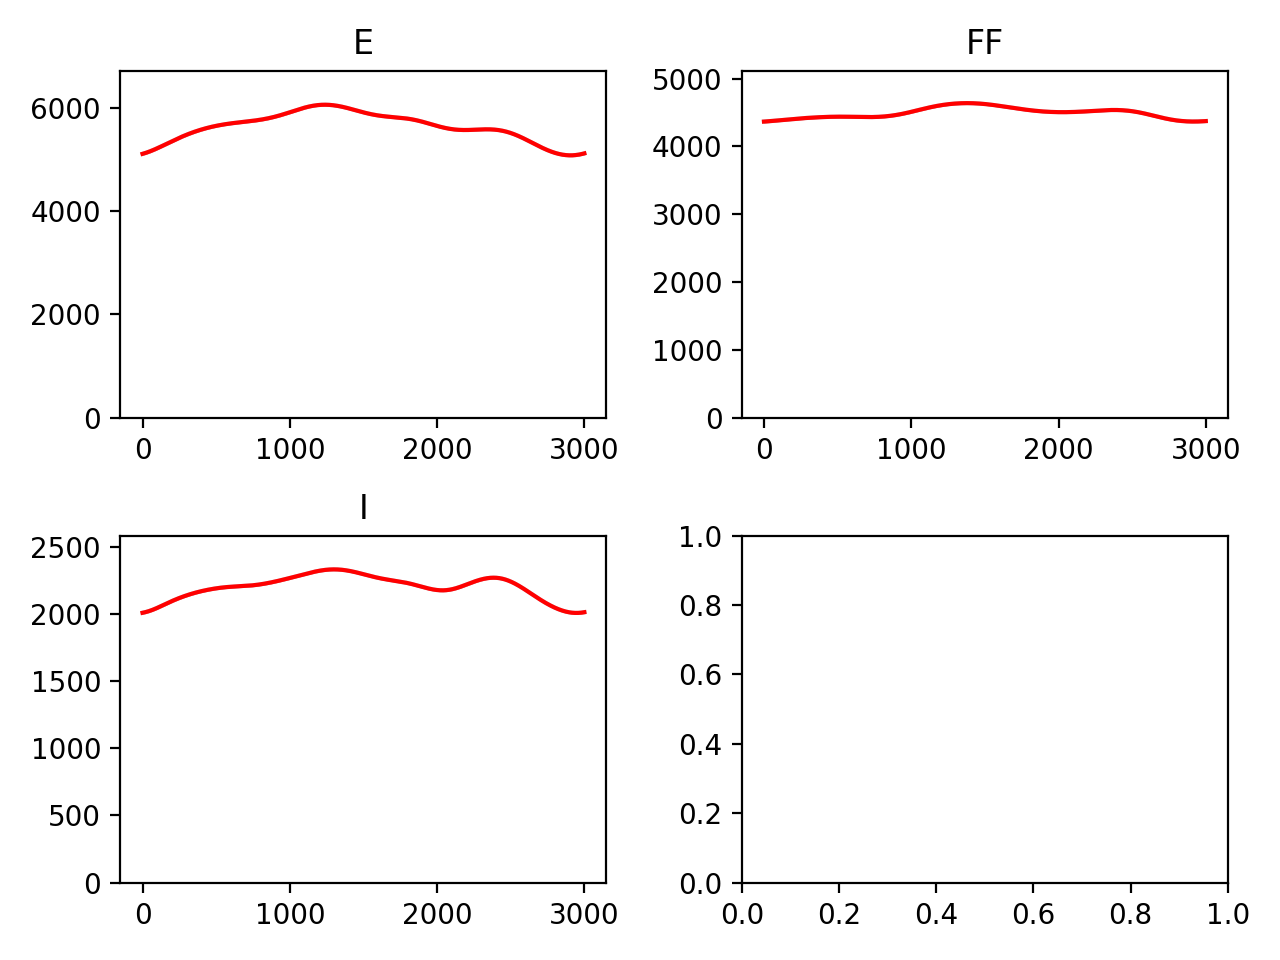

In [12]:
fig, axes = plt.subplots(2,2)
for i, pop_name in enumerate(trial_pop_sum_run_firing_rates_list_dict):
    for j in range(num_trials):
        axes.flat[i].plot(run_binned_t, trial_pop_sum_run_firing_rates_list_dict[pop_name][j], alpha=0.25)
    axes.flat[i].plot(run_binned_t, mean_trial_pop_sum_run_firing_rates_dict[pop_name], c='r')
    axes.flat[i].fill_between(run_binned_t, mean_trial_pop_sum_run_firing_rates_dict[pop_name] - 
                              sem_trial_pop_sum_run_firing_rates_dict[pop_name], 
                              mean_trial_pop_sum_run_firing_rates_dict[pop_name] + 
                              sem_trial_pop_sum_run_firing_rates_dict[pop_name], color='r', alpha=0.25)
    axes.flat[i].set_ylim((0., axes.flat[i].get_ylim()[1]*1.1))
    axes.flat[i].set_title(pop_name)
fig.tight_layout()

In [ ]:
fig, axes = plt.subplots(2,2)
for i, pop_name in enumerate(full_pop_mean_rate_from_binned_spike_count_dict_list[0]):
    all_trials = []
    for j in range(num_trials):
        this_pop_mean_rate_from_binned_spike_count = np.interp(run_binned_t, run_full_binned_t_list[j],
                                                              full_pop_mean_rate_from_binned_spike_count_dict_list[j][pop_name])
        axes.flat[i].plot(run_full_binned_t_list[j], full_pop_mean_rate_from_binned_spike_count_dict_list[j][pop_name], 
                          alpha=0.25)
        all_trials.append(this_pop_mean_rate_from_binned_spike_count)
    axes.flat[i].plot(run_binned_t, np.mean(all_trials, axis=0), c='k')
    axes.flat[i].set_title(pop_name)
fig.tight_layout()

In [ ]:
for run_t in run_full_binned_t_list:
    print(run_t[0])
    

In [ ]:
pop_name = 'E'
run_full_spike_times_dict_list = []
run_buffered_binned_spike_count_list = []
run_buffered_firing_rates_list = []
run_full_binned_t_list = []
run_buffered_binned_t_list = []
run_tuning_peak_locs_list = []
run_data_group_key = 'simple_network_exported_data'
for run_data_key in trial_keys:
    with h5py.File(run_data_file_path, 'r') as f:
        group = get_h5py_group(f, ['shared_context'])
        run_buffered_binned_t = group['buffered_binned_t'][:]
        run_binned_dt = run_buffered_binned_t[1] - run_buffered_binned_t[0]
        run_buffered_binned_t_list.append(run_buffered_binned_t)
        if 'tuning_peak_locs' in group and len(group['tuning_peak_locs']) > 0:
            subgroup = group['tuning_peak_locs']
            run_tuning_peak_locs = dict()
            for target_gid, peak_loc in zip(subgroup[pop_name]['target_gids'], subgroup[pop_name]['peak_locs']):
                run_tuning_peak_locs[target_gid] = peak_loc
        run_tuning_peak_locs_list.append(run_tuning_peak_locs)
        group = get_h5py_group(f, [run_data_key, run_data_group_key])
        run_full_binned_t = group['full_binned_t'][:]
        run_full_binned_t_list.append(run_full_binned_t)
        run_full_spike_times_dict = dict()
        subgroup = group['full_spike_times']
        for gid_key in subgroup[pop_name]:
            run_full_spike_times_dict[int(gid_key)] = subgroup[pop_name][gid_key][:]
        run_full_spike_times_dict_list.append(run_full_spike_times_dict)
        run_buffered_binned_spike_count_dict = get_binned_spike_count_dict({pop_name: run_full_spike_times_dict}, run_buffered_binned_t)
        run_buffered_binned_spike_count_list.append(run_buffered_binned_spike_count_dict[pop_name])
        run_inferred_binned_t, run_buffered_firing_rates_dict = \
            infer_firing_rates_from_spike_count(run_buffered_binned_spike_count_dict, input_t=run_buffered_binned_t, 
                                                output_range=(run_buffered_binned_t[0], run_buffered_binned_t[-1]), 
                                                align_to_t=0., window_dur=20., step_dur=20.)
        run_buffered_firing_rates_list.append(run_buffered_firing_rates_dict[pop_name])

In [ ]:
trial = 0
gid = next(iter(run_buffered_binned_spike_count_list[trial]))
plt.figure()
for trial in range(len(trial_keys)):
    plt.plot(run_buffered_binned_t_list[trial], run_buffered_binned_spike_count_list[trial][gid], alpha=0.25)

In [ ]:
plt.figure()
pop_sum_binned_spike_count_list = []
for trial in range(len(trial_keys)):
    pop_sum_binned_spike_count = np.sum(list(run_buffered_firing_rates_list[trial].values()), axis=0)
    pop_sum_binned_spike_count_list.append(pop_sum_binned_spike_count)
    plt.plot(run_inferred_binned_t, pop_sum_binned_spike_count, alpha=0.25)
plt.plot(run_inferred_binned_t, np.mean(pop_sum_binned_spike_count_list, axis=0), c='k')
plt.ylim((0., plt.ylim()[1]))

In [ ]:
plt.figure()
pop_sum_binned_spike_count_list = []
for trial in range(len(trial_keys)):
    pop_sum_binned_spike_count = np.sum(list(run_buffered_binned_spike_count_list[trial].values()), axis=0)
    pop_sum_binned_spike_count_list.append(pop_sum_binned_spike_count)
    plt.plot(run_buffered_binned_t_list[trial], pop_sum_binned_spike_count, alpha=0.25)
plt.plot(run_buffered_binned_t_list[trial], np.mean(pop_sum_binned_spike_count_list, axis=0), c='k')

In [ ]:
trial = 0
gid = next(iter(run_buffered_binned_spike_count_list[trial]))
plt.figure()
pop_sum_binned_spike_count_list = []
for trial in range(len(trial_keys)):
    pop_sum_binned_spike_count = run_buffered_firing_rates_list[trial][gid]
    pop_sum_binned_spike_count_list.append(pop_sum_binned_spike_count)
    plt.plot(run_inferred_binned_t, pop_sum_binned_spike_count, alpha=0.25)
plt.plot(run_inferred_binned_t, np.mean(pop_sum_binned_spike_count_list, axis=0), c='k')